# DataQuest Guided Project 17: Car market price prediction 


This is the 17th Guided Project from the DataQuest Data Science track. The goal is to explore a data set consisting of cars and their technical aspects such as weight, mpgs, acceleration and come up with a way to predict price of a car given it's attributes. 

The project works with data from the UCI Machine Learning Repository: 
https://archive.ics.uci.edu/ml/datasets/automobile

Primarily the objective is to work with the k-nearest neighbors algorithm.

## Reading in the data set and finding numeric columns

We are looking to do k-nearest neighbors regresssion so we'll work with numeric data from the data set first. 

In [1]:
import pandas as pd


cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

print(cars.info())

cars.head(2)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


#### Integer Columns:
symboling,
curb-weigth, 
engine-size,
city-mpg,
highway-mpg

#### Float Columns:
wheelbase,
length,
width,
height,
compression-weight

#### Possible Other Numeric
normalized-losses,
num-of-doors,
num-of-cylinders, 
bore,
stroke,
horsepower,
peak-rpm

#### Targe Column for Algorithm
price


## Cleaning the Data Set

we need to to define the '?' seen in the normalized-losses column with Nan values, filter for only the numerical columns, fill in any NaNs, and normalize the non-target columns

In [2]:
import numpy as np
cars = cars.replace('?',np.nan)
cars.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [3]:
cars.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [4]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

numeric_cars.head(2)


,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500


In [5]:
numeric_cars['normalized-losses'].isnull().sum()

41

In [6]:
len(numeric_cars['normalized-losses'])

205

The normalized losses column has 41/205 NaN values that need to be handled. The column is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

Let's explore the number of NaN values by row.

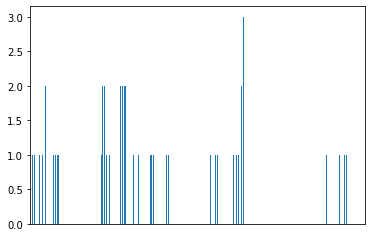

0    160
1     35
2      8
3      2
dtype: int64

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

null_sums = numeric_cars.isnull().sum(axis=1)

null_sums.plot(kind='bar')
plt.xticks([])
plt.show()
numeric_cars.isnull().sum(axis=1).value_counts()

Most NaN rows only have one NaN value and at most 3 columns are NaN in 2 rows. This implies we don't nessisarily need to drop rows where the normalized-losses column is NaN. We will instead try filling in the missing values with the average values from the column. Let's drop the rows that do have more than one missing value as well. 

In [8]:
numeric_cars = numeric_cars.dropna(thresh=13)
numeric_cars.isnull().sum(axis=1).value_counts()

0    160
1     35
dtype: int64

In [9]:
numeric_cars['normalized-losses'] = numeric_cars['normalized-losses'].astype('float64')
normalized_losses_mean = numeric_cars['normalized-losses'].mean()
print(normalized_losses_mean)

121.3


In [10]:
numeric_cars['normalized-losses'] = numeric_cars['normalized-losses'].fillna(normalized_losses_mean)
numeric_cars['normalized-losses'].isnull().sum()

0

In [11]:
numeric_cars['normalized-losses'].isnull().sum()

0

In [12]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    195 non-null float64
wheel-base           195 non-null float64
length               195 non-null float64
width                195 non-null float64
height               195 non-null float64
curb-weight          195 non-null float64
bore                 195 non-null float64
stroke               195 non-null float64
compression-rate     195 non-null float64
horsepower           195 non-null float64
peak-rpm             195 non-null float64
city-mpg             195 non-null float64
highway-mpg          195 non-null float64
price                195 non-null float64
dtypes: float64(14)
memory usage: 22.9 KB


In [13]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col
numeric_cars.head(2)


,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.294764,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.294764,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125,0.294393,0.346939,0.222222,0.289474,16500.0


## Univeriate Model

In the first iteration of this function, we'll use just one column to train the KNeighborsRegressor with at a time and determine for a value of k=5, which column has the lowest rmse as a predictor for price. 

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(df, training_col, target_col, k):
    #split the data into a training and test set
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    half = int(len(df)/2)
    train = rand_df.iloc[0:half]
    test = rand_df.iloc[half:]
    
    #instantiate the KNeighborsRegressor class
    knn = KNeighborsRegressor(n_neighbors=k)
    
    #fit the model on the training set
    knn.fit(train[[training_col]], train[target_col])

    #make predictions on the test set
    predicted_labels = knn.predict(test[[training_col]])
    
    #calculate RMSE and return that value 
    mse = mean_squared_error(test[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    
    return rmse

In [15]:
columns = numeric_cars.drop('price',axis=1).columns
for col in columns:
    print(col)   
    print(knn_train_test(numeric_cars, col, 'price',5))

normalized-losses
7050.38518765363
wheel-base
5692.794469058125
length
5210.375155829933
width
4934.118151510077
height
7574.683028055379
curb-weight
4594.66840143918
bore
7076.77561366209
stroke
7217.395543789337
compression-rate
7020.882647516912
horsepower
4543.271115190293
peak-rpm
7313.971817929666
city-mpg
4437.412782379445
highway-mpg
4409.808045940415


Before assessing which column performed best, we'll run this over with different values of k and store the results to display graphically.

In [16]:
k_vals = [1,3,5,7,9]

rmse = pd.DataFrame(index=k_vals , columns = columns)
for col in columns:
    for k in k_vals:
        rmse.loc[k][col] = knn_train_test(numeric_cars,col,'price',k)

rmse

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
1,7643.6,5718.71,5294.12,6247.14,9144.69,6739.43,9782.24,7395.42,7083.66,4333.42,6920.34,5622.61,5591.29
3,7706.62,5718.48,5152.08,5419.04,8163.54,5187.9,6987.84,7098.71,6717.97,4581.26,7140.7,4206.81,4674.1
5,7050.39,5692.79,5210.38,4934.12,7574.68,4594.67,7076.78,7217.4,7020.88,4543.27,7313.97,4437.41,4409.81
7,7137.93,5725.91,5380.41,4520.04,7909.81,4125.29,7604.13,7620.37,6879.38,4784.71,7285.09,4599.83,4269.12
9,7060.91,5840.8,5345.18,4469.77,7609.84,4175.97,7654.95,7436.3,7206.36,4757.01,7239.11,4520.11,4234.82


Text(0, 0.5, 'RMSE')

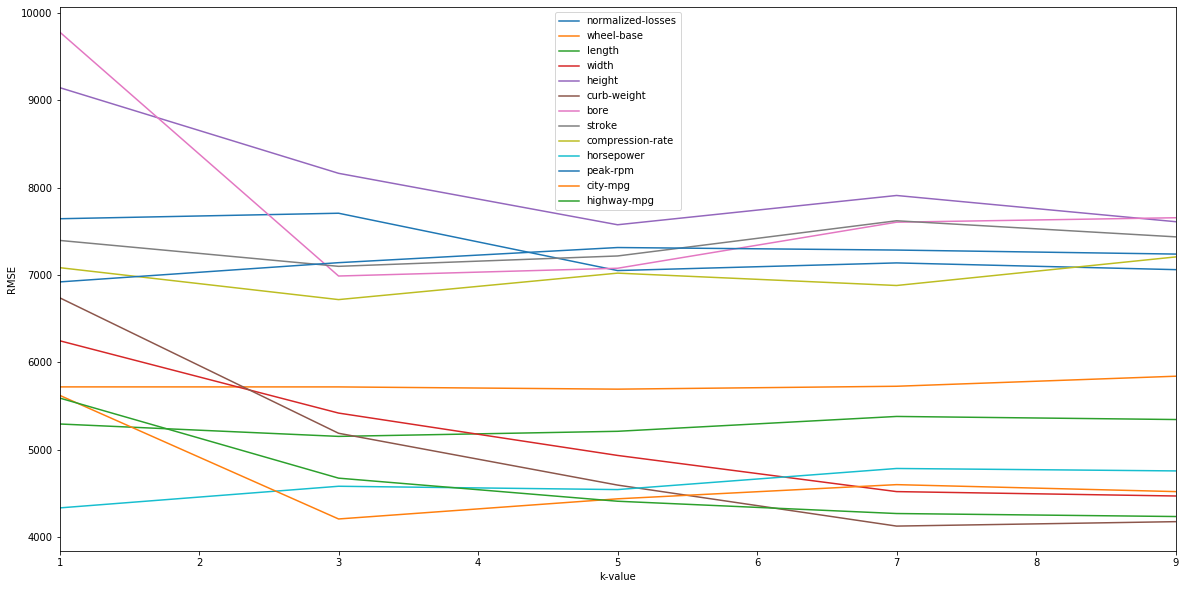

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

rmse.plot(figsize=(20,10))
plt.xlabel('k-value')
plt.ylabel('RMSE')


Using only one column as a predictor, it looks like the combination of highway-mpg and a k value of 7 would provide a lower rmse than some of the other options. However, likely we can do better using multiple columns as predictor information. 

## Multivariate Model

In [18]:
def multivar_knn_train_test(df, training_cols, target_col, k):
    #split the data into a training and test set
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    half = int(len(df)/2)
    train = rand_df.iloc[0:half]
    test = rand_df.iloc[half:]
    
    #instantiate the KNeighborsRegressor class
    knn = KNeighborsRegressor(n_neighbors=k)
    
    #fit the model on the training set
    knn.fit(train[training_cols], train[target_col])

    #make predictions on the test set
    predicted_labels = knn.predict(test[training_cols])
    
    #calculate RMSE and return that value 
    mse = mean_squared_error(test[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

For the default value of 5 neighbors, we'll take a look at using the lowest 2, 3, 4, and 5 rmse valued individual columns from the rmse table in the last step. 

In [19]:
rmse.loc[5].sort_values()[0:5]

highway-mpg    4409.81
city-mpg       4437.41
horsepower     4543.27
curb-weight    4594.67
width          4934.12
Name: 5, dtype: object

In [20]:
train_cols = list(rmse.loc[5].sort_values()[0:5].index)
multi_rmse = {}
for i in range(2,6):
    model = str(i)+'_columns_model'
    multi_rmse[model]= multivar_knn_train_test(numeric_cars,train_cols[0:i],'price',5)
        
multi_rmse

{'2_columns_model': 4150.431220773011,
 '3_columns_model': 3562.0050421648994,
 '4_columns_model': 3772.972620940596,
 '5_columns_model': 3730.9709218915123}

For the default value of k = 5, looking at models that use the top 2, 3, 4, and 5 individually performing predictive columns, the 3 2 column model performs the worst so we'll continue to optimize for k next using only the 3, 4, and 5 column models. 

In [21]:
train_cols = list(rmse.loc[5].sort_values()[0:5].index)
k_vals = np.arange(1,26)
multi_rmse = pd.DataFrame(index=k_vals , columns = ['3_columns_model','4_columns_model','5_columns_model'])
for i in range(3,6):
    for k in k_vals: 
        col = str(i)+'_columns_model'
        multi_rmse.loc[k][col] = multivar_knn_train_test(numeric_cars,train_cols[0:i],'price',k)
        
multi_rmse

,3_columns_model,4_columns_model,5_columns_model
1,4480.25,3976.23,3519.15
2,3557.41,3651.06,3796.03
3,3492.91,3610.27,3710.05
4,3381.49,3703.57,3575.41
5,3562.01,3772.97,3730.97
6,3779.23,3877.96,3857.45
7,3710.37,3823.17,3861.43
8,3775.41,3907.38,3851.28
9,3941.52,3967.49,3951.25
10,4135.57,4077.54,4020.77


In [22]:
multi_rmse['3_columns_model'].sort_values()[0:5]

4    3381.49
3    3492.91
2    3557.41
5    3562.01
7    3710.37
Name: 3_columns_model, dtype: object

In [23]:
multi_rmse['4_columns_model'].sort_values()[0:5]

3    3610.27
2    3651.06
4    3703.57
5    3772.97
7    3823.17
Name: 4_columns_model, dtype: object

In [24]:
multi_rmse['5_columns_model'].sort_values()[0:5]

1    3519.15
4    3575.41
3    3710.05
5    3730.97
2    3796.03
Name: 5_columns_model, dtype: object

For the 3 column model, the optimal k values are 2, 3, 4, 5, and 7. For the 4 column model, the optimal k value